# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Mauritius Sahala Syafaat Manurung
- **Email:** mauritiusmanurungnightfury@gmail.com
- **ID Dicoding:** Mauritius Manurung

## Menentukan Pertanyaan Bisnis

- Bagaimana hubungan tingkat kualitas barang yang dilihat dari user review dengan harga barang?
- Bagaimana korelasi tingkat kemakmuran rakyat yang dilihat dari rata-rata harga item yang dibeli dengan kota tempat tinggalnya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customers_dataset.csv to customers_dataset (1).csv
Saving order_payments_dataset.csv to order_payments_dataset (1).csv
Saving order_reviews_dataset.csv to order_reviews_dataset (1).csv
Saving orders_dataset.csv to orders_dataset (1).csv


In [ ]:
customers = pd.read_csv("customers_dataset.csv")
order_payments = pd.read_csv("order_payments_dataset.csv")
order_reviews = pd.read_csv("order_reviews_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")

In [ ]:
payment_reviews_df = pd.merge(order_payments,order_reviews,on="order_id", how="outer")

In [ ]:
customer_orders = pd.merge(customers,orders,on="customer_id")
customer_order_price_df = pd.merge(customer_orders,order_payments,on="order_id")

### Assessing Data

In [ ]:
payment_reviews_df.isnull().sum()

order_id                       0
payment_sequential             1
payment_type                   1
payment_installments           1
payment_value                  1
review_id                    800
review_score                 800
review_comment_title       92482
review_comment_message     61662
review_creation_date         800
review_answer_timestamp      800
dtype: int64

Sebelum melakukan proses data cleaning, terdapat banyak kolom yang berisi missing value. Kolom dengan value yang tidak dibutuhkan dan memiliki missing value yang sangat banyak akan di-drop, dan sisa kolom lainnya yang juga memiliki missing value akan diproses menggunakan metode imputation dengan mean.

In [ ]:
payment_reviews_df.to_csv("payment_reviews.csv", index=False)
customer_order_price_df.to_csv("customer_order_price.csv", index=False)

In [ ]:
customer_order_price_df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 175
order_delivered_carrier_date     1888
order_delivered_customer_date    3132
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
dtype: int64

### Cleaning Data

In [ ]:
drop_columns1 = ["review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp", "review_id","payment_sequential","payment_type"]
payment_reviews_df.drop(columns=drop_columns1, inplace=True)
payment_reviews_df.review_score.fillna(value=payment_reviews_df.review_score.median(), inplace = True)

Untuk dataframe pertama, kolom dengan value yang tidak dibutuhkan dan memiliki missing value yang sangat banyak di-drop, kolom dengan missing value yang dapat ditoleransi diproses menggunakan metode imputation dengan mean.

In [ ]:
payment_reviews_df.isnull().sum()

order_id                0
payment_installments    1
payment_value           1
review_score            0
dtype: int64

Setelah melakukan proses data cleaning menggunakan metode dropping dan imputation, jumlah missing value turun di angka yang dapat ditoleransi.

In [ ]:
drop_columns2 = ["order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","payment_type","payment_installments","customer_zip_code_prefix","order_estimated_delivery_date","payment_sequential","order_status"]
customer_order_price_df.drop(columns=drop_columns2, inplace=True)

Untuk dataframe kedua, kolom dengan value yang tidak dibutuhkan di-drop agar tidak mempengaruhi keluaran akhir dari analisis data kita.

In [ ]:
customer_order_price_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_city               0
customer_state              0
order_id                    0
order_purchase_timestamp    0
payment_value               0
dtype: int64

Setelah dibersihkan, dataframe kedua sudah tidak memiliki missing value.

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
payment_reviews_df.describe(include="all")

,order_id,payment_installments,payment_value,review_score
count,104478,104477.000000,104477.000000,104478.000000
unique,99441,NaN,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,NaN,NaN
freq,29,NaN,NaN,NaN
mean,NaN,2.856418,153.923071,4.090871
std,NaN,2.690075,217.120187,1.346407
min,NaN,0.000000,0.000000,1.000000
25%,NaN,1.000000,56.780000,4.000000
50%,NaN,1.000000,100.000000,5.000000
75%,NaN,4.000000,171.690000,5.000000


Berdasarkan rangkuman di atas, kita mengetahui bahwa terjadi sebanyak 104.478 pesanan, dengan rata-rata penilaian review sebanyak 4 bintang, dengan review terendah bernilai 1 bintang, serta review tertinggi bernilai 5 bintang. Informasi ini menunjukkan bahwa rata-rata pesanan yang dikirimkan melewati proses pelayanan dan pengiriman yang baik dari perusahaan E-commerce ini.

array([[<Axes: title={'center': 'payment_installments'}>,
        <Axes: title={'center': 'payment_value'}>],
       [<Axes: title={'center': 'review_score'}>, <Axes: >]], dtype=object)

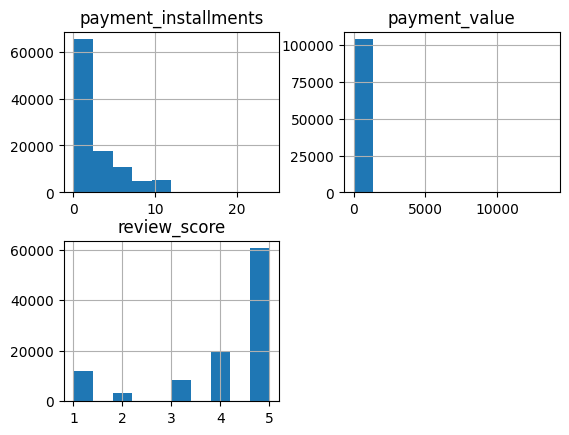

In [ ]:
payment_reviews_df.hist()

Histogram ini mewakili informasi yang terdapat pada dataframe "payment_reviews_df".

In [ ]:
customer_order_price_df.describe(include="all")

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_purchase_timestamp,payment_value
count,103886,103886,103886,103886,103886,103886,103886.000000
unique,99440,96095,4119,27,99440,98874,NaN
top,9af2372a1e49340278e7c1ef8d749f34,9a736b248f67d166d2fbb006bcb877c3,sao paulo,SP,fa65dad1b0e818e3ccc5cb0e39231352,2017-04-20 12:45:34,NaN
freq,29,33,16221,43622,29,29,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,154.100380
std,NaN,NaN,NaN,NaN,NaN,NaN,217.494064
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,56.790000
50%,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,171.837500


Karena data ini diambil dari Brazil, saya akan menggunakan mata uang Brazil yaitu Real Brazil (BRL). Berdasarkan rangkuman di atas, kita mengetahui bahwa pembayaran dengan nilai terendah berada di nilai 0 BRL, tertinggi dengan nilai 13,664 BRL. Rata-rata pembayaran yang terjadi di bisnis e-commerce ini adalah 154.1 BRL.

## Visualization & Explanatory Analysis

Setelah membersihkan data, kita melakukan analisis visual dan penjelasan.

### Pertanyaan 1:

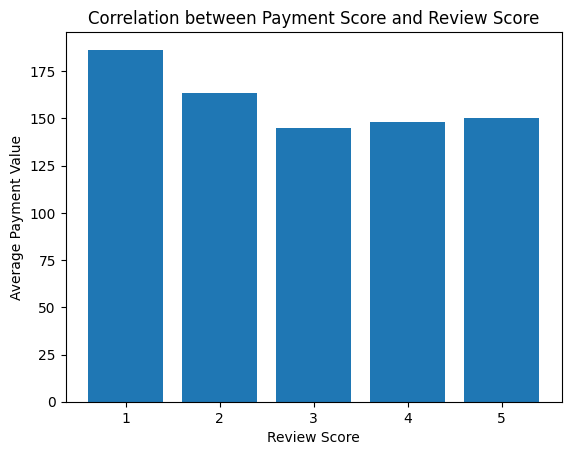

In [ ]:
score_payment_correlation = {
    'review_score', 'payment_value'
}
average_payment_per_score = payment_reviews_df.groupby('review_score')['payment_value'].mean()
average_payment_per_score = average_payment_per_score.reset_index()

plt.bar(average_payment_per_score['review_score'], average_payment_per_score['payment_value'])

plt.xlabel('Review Score')
plt.ylabel('Average Payment Value')
plt.title('Correlation between Payment Score and Review Score')

plt.show()

Visualisasi di atas merepresentasikan data dari analisis hubungan antara harga item dan kualitasnya, yang dilihat dari nilai review. Harga rata-rata tertinggi terdapat pada item dengan nilai review 1 dan terendah terdapat pada item review score 3.

### Pertanyaan 2:

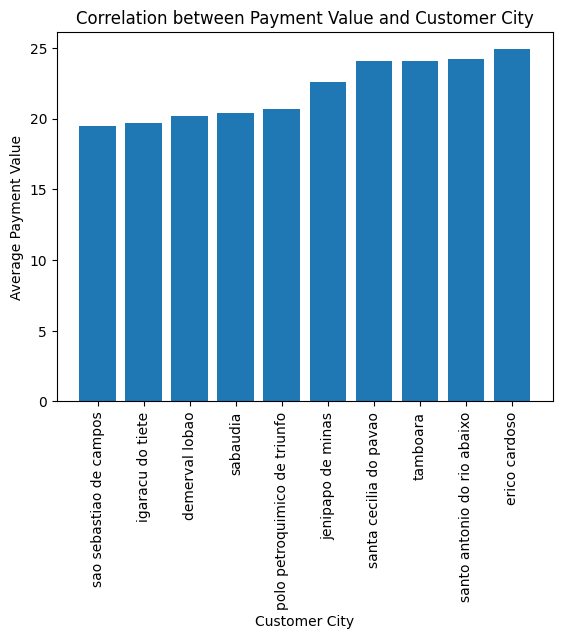

In [ ]:
import matplotlib.pyplot as plt

average_payment_per_city = customer_order_price_df.groupby('customer_city')['payment_value'].mean()
top_10_cities = average_payment_per_city.sort_values(ascending=True).head(10)

plt.bar(top_10_cities.index, top_10_cities.values)

plt.xlabel('Customer City')
plt.ylabel('Average Payment Value')
plt.title('Correlation between Payment Value and Customer City')

# Rotate the x-axis labels vertically
plt.xticks(rotation='vertical')

plt.show()

Visualisasi di atas mewakili data yang digunakan untuk mencari korelasi tingkat kemakmuran rakyat dan kota tempat tinggalnya. Terdapat beberapa kota yang memiliki rata-rata pembayaran tertinggi.

In [ ]:
all_df = pd.merge(
    left = payment_reviews_df,
    right = customer_order_price_df
)
all_df.head()

,order_id,payment_installments,payment_value,review_score,customer_id,customer_unique_id,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,8.0,99.33,1.0,0a8556ac6be836b46b3e89920d59291c,708ab75d2a007f0564aedd11139c7708,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1.0,24.39,5.0,f2c7fc58a9de810828715166c672f10a,a8b9d3a27068454b1c98cc67d4e31e6f,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1.0,65.71,5.0,25b14b69de0b6e184ae6fe2755e478f9,6f70c0b2f7552832ba46eb57b1c5651e,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,8.0,107.78,5.0,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG
4,ba78997921bbcdc1373bb41e913ab953,8.0,107.78,5.0,7a5d8efaaa1081f800628c30d2b0728f,87695ed086ebd36f20404c82d20fca87,juiz de fora,MG


In [ ]:
all_df.to_csv("all_data.csv", index = False)

## Conclusion

- Dari bar chart representasi data yang telah diproses, kita dapat melihat bahwa item yang mendapatkan nilai review 1 memiliki memiliki harga yang paling tinggi, diikuti oleh produk dengan nilai review 2, 5, 4, dan 3. Review dengan nilai 1 dan 2 ini disebabkan oleh beberapa hal, salah satu yang paling memungkinkan adalah ketidakpuasan customer dengan kualitas item tersebut, walaupun memiliki harga yang tinggi. Terdapat margin yang jauh antara item dengan nilai review 1 dan 5, dimana harga rata-ratanya tidak mencapai harga rata-rata di market. Rata-rata harga item di bisnis ini adalah 153.9 BRL, sedangkan rata-rata harga item dengan nilai 5 adalah di sekitar nilai 150 BRL. Dari analisis ini dapat disimpulkan bahwa harga barang yang tinggi belum tentu menerjemahkan kualitasnya.
- Dari bar chart yang mewakili data yang telah diproses, kita dapat melihat kota-kota yang memiliki rata-rata harga pembelian tertinggi se-Brazil. Namun, grafik tersebut tidak dapat menunjukkan kota-kota termakmur di brazil. Setelah dilihat lebih lanjut, jumlah data yang memiliki kota-kota tersebut sangat sedikit. Sebagai contoh, kota Erico Cardoso hanya memiliki sebanyak tujuh buah data dan Santo Antônio do Rio Abaixo sebanyak 12 buah data, sedangkan total data di dataset tersebut ada sebanyak lebih dari 100.000. Jadi belum terlihat korelasi antara kemakmuran rakyat dengan kota tempat tinggalnya dari dataset ini.